# ДЗ Линейная регрессия

В данном задании мы рассмотрим набор данных об учащихся, собранный в 2006 году в одной из школ Португалии. Данные представлены в неудобном для машинного обучения виде, и содержат мусор. Ваша задача &mdash; привести их к надлежащему виду и обучить на них простую модель.

Данные состоят из четырех файлов:
- data.csv &mdash; основная таблица с информацией о учащихся
- scores.csv &mdash; список финальных оценок по одному из предметов (20-балльная шкала переведенная в проценты)
- attendance.csv &mdash; таблица посещений занятий по этому предмету
- school_support.txt &mdash; список учащихся, которым оказывается финансовая поддержка

Ваша задача &mdash; построить модель для предсказания финальных оценок исходя из всех остальных данных и проверить качество ее работы с помощью кросс-валидации. В качестве алгоритма мы будем использовать линейную регрессию

Расшифровка столбцов в data.csv для справки:
- age &mdash; возраст
- Medu &mdash; уровень образования матери (по некоторой условной шкале)
- Fedu &mdash; уровень образования отца (по некоторой условной шкале)
- traveltime &mdash; время в пути до школы (1 – < 15 мин., 2 – от 15 до 30 мин., 3 – от 30 мин. to 1 ч.
или 4 – > 1 ч.)
- studytime &mdash; время, затрачиваемое на занятия вне школы (1 – < 2 ч., 2 – от 2 до 5 ч., 3 – от 5 до 10 ч. или 4 – > 10 ч.)
- famrel &mdash; насколько хорошие отношения в семье у учащегося (по некоторой условной шкале)
- freetime &mdash; количество свободного времени вне школы (по некоторой условной шкале)
- goout &mdash; время, затрачиваемое на общение с друзьями (по некоторой условной шкале)
- Dalc &mdash; количество употребления алкоголя в учебные дни (по некоторой условной шкале)
- Walc &mdash; количество употребления алкоголя в неучебные дни (по некоторой условной шкале)
- health &mdash; уровень здоровья (по некоторой условной шкале)
- sex_M &mdash; пол: мужской (1) или женский (0)
- address_U &mdash; живет ли учащийся в городе (1) или в пригороде (0)
- famsize_LE3 &mdash; размер семьи: не больше 3 человек (1) или больше (0)
- Pstatus_T &mdash; живут ли родители вместе (1) или отдельно (0)
- nursery &mdash; посещал ли учащийся детский сад
- plans_university &mdash; планирует ли учащийся поступать в университет (-1 или 1)
- past_failures &mdash; количество неудовлетворительных оценок по другим предметам ранее (от 0 до 4)

*Примечание. Несколько признаков в данных содержат ошибки/проблемы/некорректности. Эти проблемы нужно исправить. Для
проверки &mdash; всего в данных таких проблем четыре.*

### Задача 1: сломанный признак (а может и не один)
__(1 балл)__

Загрузите таблицу data.csv.

Найдите в данных сломанный признак (он не соответствует описанию) и исправьте его.

In [158]:
import numpy as np
import pandas as pd
data = pd.read_csv("data.csv")
data = data.join(data['plans_universitypast_failures'].apply(str).str.extract('(-?1)(\d)').apply(lambda x: [int(x[0]),int(x[1])],axis=1, result_type='expand').rename(columns={0:'plans_university', 1: 'past_failures'}))
data = data.drop('plans_universitypast_failures', axis=1)


Два последних столбца *plans_university* и *past_failures* были объединены.

### Задача 2: пропуски в данных 
__(1 балл)__

Проверьте, есть ли в данных пропуски (значения NaN). Замените все пропущенные значения на среднее значение этого признака по столбцу.

*Hint: изучите в pandas функции loc, isnull, а также передачу булевых массивов в качестве индексов.*

In [159]:
data = data.fillna(data.mean())

### Задача 3: нормализация данных
__(1 балл)__

Нормализуйте данные любым способом

In [160]:
data = (data - data.min()) / (data.max() - data.min())

### Задача 4: кросс-валидация для исходных данных
__(1 балл)__

Загрузите файл scores.csv и протестируйте, как линейная регрессия предсказывает ответ сейчас (с помощью кросс-валидации).

Кроссвалидацию сделайте по 4 разбивкам. Выведите качество в каждом их разбиений.

*Hint: воспользуйтесь sklearn.linear_model и sklearn.model_selection.*

In [161]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
scores = pd.read_csv("scores.csv",header=None)
x, y = data, scores
regression = LinearRegression()
test_scores = cross_val_score(regression, x, y, cv = 4)
print(test_scores)
print(test_scores.mean())

[0.21559119 0.25926843 0.14207912 0.232442  ]
0.212345183160651


### Задача 5: полные данные
__(2 балла)__

Воспользуйтесь файлами attendance.csv и school_support.txt для того, чтобы добавить новые признаки в данные. Желательно по максимуму использовать возможности pandas для упрощения преобразований.

school_support число в строке значит что i-ый школьник из исходной таблицы получал мат помощь (обратите внимание что строк в файле меньше, подумайте как правильно импортировать данные)

Добавьте данные таким образом, чтобы качество выросло

In [162]:
school_support = pd.read_csv('school_support.txt', header=None)
data['school_support'] = 0
data['school_support'][school_support[0]] = 1
attendance = pd.read_csv("attendance.csv")
attendance = attendance.apply(lambda x:  x[0].count('+'), axis=1)
data['attendance'] = attendance

<ipython-input-162-8284f1975cee>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['school_support'][school_support[0]] = 1


### Задача 6: борьба с выбросами
__(1.5 балла)__

Качество предсказания может ухудшаться, если в данных присутствуют корректные значения признаков (с точки зрения чтения данных и применения методов), но не соответствующие реальным объектам. Например, данные могли быть введены в неверном формате, а потом слишком грубо приведены к общему виду, из-за чего ошибка не была замечена.
Попробуем от такого избавиться &mdash; а для этого такие объекты нужно сначала найти. Конечно, нам еще недоступны многие продвинутые способы, но давайте попробуем обойтись простыми.

Первый способ это сделать &mdash; посмотреть для каждого признака на распределение его значений и проверить крайние значения на правдоподобность. (постройте гистограммы для признаков, как минимум для подозрительных)

*Hint 1: используйте функцию DataFrame.hist*

*Hint 2: в описании датасета выше есть информация, необходимая для восстановления правильных значений*

array([[<AxesSubplot:title={'center':'school_support'}>]], dtype=object)

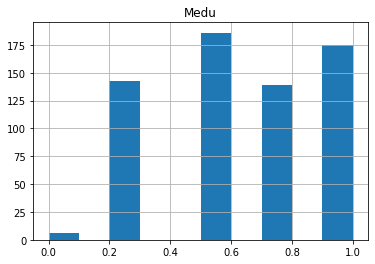

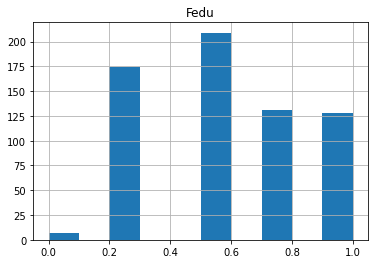

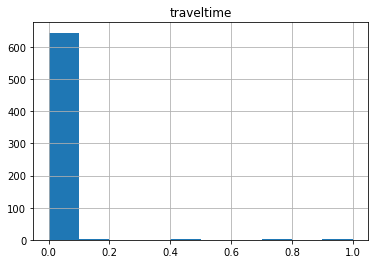

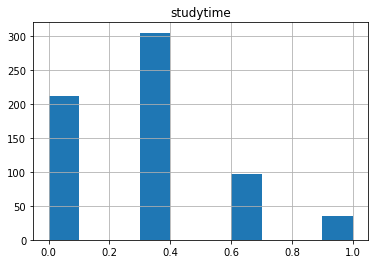

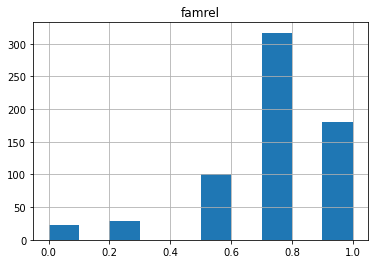

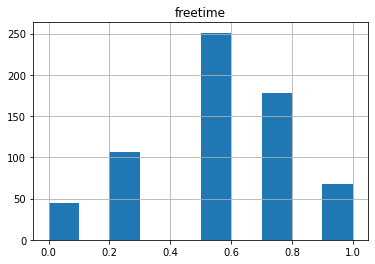

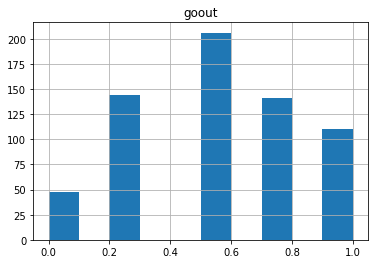

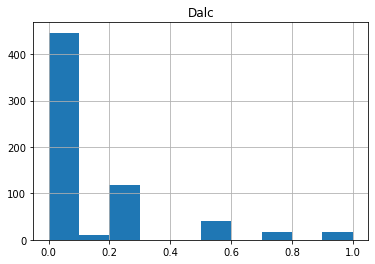

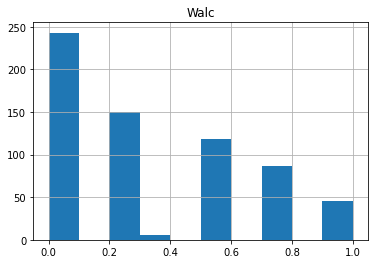

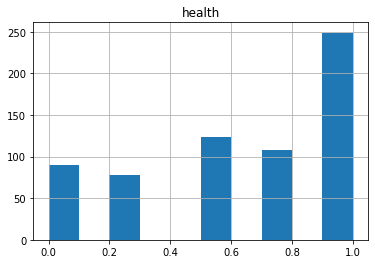

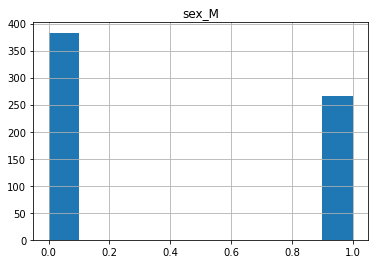

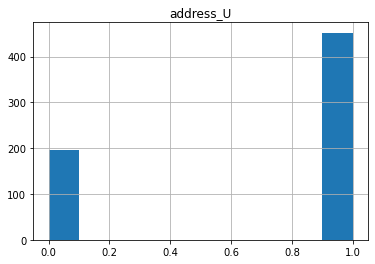

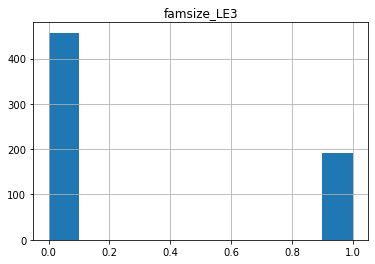

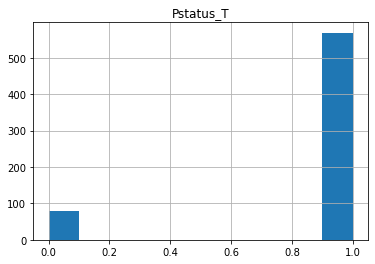

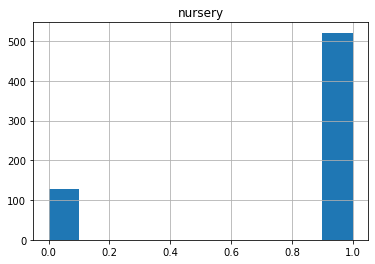

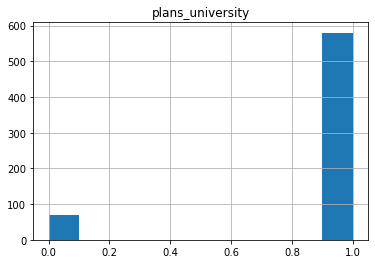

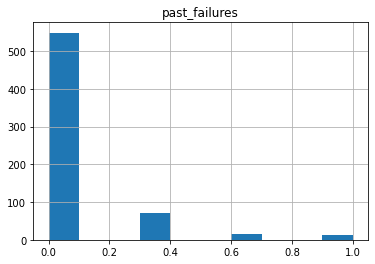

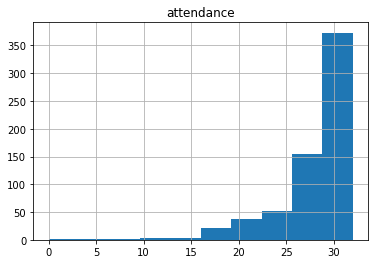

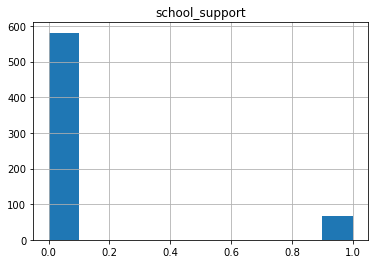

In [151]:
data.hist(column="Medu", grid=True)
data.hist(column="Fedu", grid=True)
data.hist(column="traveltime", grid=True)
data.hist(column="studytime", grid=True)
data.hist(column="famrel", grid=True)
data.hist(column="freetime", grid=True)
data.hist(column="goout", grid=True)
data.hist(column="Dalc", grid=True)
data.hist(column="Walc", grid=True)
data.hist(column="health", grid=True)
data.hist(column="sex_M", grid=True)
data.hist(column="address_U", grid=True)
data.hist(column="famsize_LE3", grid=True)
data.hist(column="Pstatus_T", grid=True)
data.hist(column="nursery", grid=True)
data.hist(column="plans_university", grid=True)
data.hist(column="past_failures", grid=True)
data.hist(column="attendance", grid=True)
data.hist(column="school_support", grid=True)

In [163]:
data = pd.read_csv("data.csv")
data = data.join(data['plans_universitypast_failures'].apply(str).str.extract('(-?1)(\d)').apply(lambda x: [int(x[0]),int(x[1])],axis=1, result_type='expand').rename(columns={0:'plans_university', 1: 'past_failures'}))
data = data.drop('plans_universitypast_failures', axis=1)
wrong_index = data[(data.traveltime < 1) | (data.traveltime > 4)].index
data = data.drop(wrong_index)
data['age'] = data['age'].apply(lambda x: 2006 - x if x > 100 else x)
data = data.fillna(data.mean())
data = (data-data.min())/(data.max()-data.min())
attendance = pd.read_csv("attendance.csv")
attendance = attendance.drop(wrong_index)
attendance = attendance.apply(lambda x:  x[0].count('+'), axis=1)
data['attendance'] = attendance
school_support = pd.read_csv("school_support.txt", header=None)
data['support'] = 0
data['support'][school_support[0]] = 1
data = data.reset_index(drop=True)
attendance = attendance.reset_index(drop=True)

<ipython-input-163-e9003cacd2dd>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['support'][school_support[0]] = 1


In [166]:
scores = scores.drop(wrong_index)
scores = scores.reset_index(drop=True)

In [168]:
data

,age,Medu,Fedu,traveltime,studytime,famrel,freetime,goout,Dalc,Walc,health,sex_M,address_U,famsize_LE3,Pstatus_T,nursery,plans_university,past_failures,attendance,support
0,0.142857,1.00,1.00,0.000000,0.333333,1.00,0.75,0.75,0.00,0.25,1.00,1.0,1.0,0.0,1.0,1.0,1.0,0.000000,26,0
1,0.285714,1.00,1.00,0.000000,0.000000,1.00,0.50,0.75,0.00,0.25,1.00,0.0,1.0,0.0,1.0,1.0,1.0,0.000000,30,0
2,0.142857,0.25,0.25,0.333333,0.000000,0.75,1.00,1.00,0.25,0.75,1.00,1.0,0.0,1.0,1.0,1.0,1.0,0.000000,32,0
3,0.428571,0.25,0.50,0.333333,0.000000,0.50,0.75,0.75,0.25,0.75,0.75,1.0,1.0,0.0,1.0,0.0,0.0,0.000000,22,0
4,0.285714,0.50,0.25,0.333333,0.333333,0.75,0.25,1.00,0.00,0.25,1.00,0.0,0.0,0.0,1.0,1.0,1.0,0.000000,32,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
640,0.000000,0.75,0.75,0.333333,0.000000,1.00,0.75,0.75,0.25,0.50,1.00,0.0,0.0,0.0,1.0,1.0,1.0,0.000000,28,0
641,0.428571,0.50,0.50,1.000000,0.333333,0.75,0.25,1.00,0.00,0.00,0.25,0.0,1.0,0.0,1.0,1.0,1.0,0.000000,30,0
642,0.000000,1.00,1.00,0.333333,0.333333,0.75,0.50,0.00,0.00,0.00,1.00,1.0,1.0,0.0,1.0,1.0,1.0,0.000000,30,0
643,0.857143,0.25,0.25,0.333333,0.333333,1.00,0.50,0.50,1.00,0.25,0.75,1.0,0.0,1.0,1.0,1.0,0.0,0.666667,11,0


__(1.5 балла)__

Другой простой способ найти выбросы &mdash; сделать предсказание и посчитать ошибку на каждом объекте по отдельности и посмотреть на объекты с наибольшей ошибкой. Обучите линейную регрессию (функция fit) и для каждого объекта посчитайте среднеквадратичное отклонение. Постройте гистограмму распределения ошибок. Посмотрите на гистограмму и удалите из выборки те объекты на которых ошибка слишком большая.

Обратите внимание, что просто удалять все объекты с высокой ошибкой нельзя &mdash; это, конечно, хороший способ добиться меньшей ошибки (на данной выборке), но одновременно вы ухудшите обобщающую способность алгоритма. Вместо этого вам нужно найти однозначно ошибочные записи и их исправить.

*Hint: возможно, все проблемы уже были найдены первым способом; для проверки &mdash; в сумме здесь нужно исправить 3 проблемы.*

Для поиска ошибки на одном отдельном обьекте придётся обучить линейную регрессию руками. Частичный пример, допишите код. Постройте гистограмму распределения ошибок

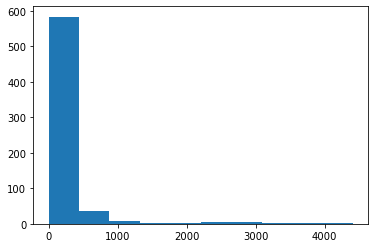

In [169]:
import sklearn
from sklearn import linear_model
from matplotlib import pyplot

regression = linear_model.LinearRegression().fit(X, Y) #create model and train it
prediction = regression.predict(X).reshape((1,-1))[0]
error = (prediction-Y[0])**2
pyplot.hist(error)

worst_index = np.argpartition(error.values, -19)[-19:]
worst = data.take(worst_index)
data = data.drop(worst_index, axis='index')
data = data.reset_index(drop=True)


Исключительно большая ошибка на людях с очень малым Y. Возможно для них есть другие причины оценки, не отраженные в выборке.

In [171]:
scores = scores.drop(worst_index, axis='index')
scores = scores.reset_index(drop=True)


### Финальное предсказание и отчёт (1 балл)

Проведите предсказание еще раз и сравните качество с исходным. Запишите свои наблюдения - как изменялось качество обучения модели при использовании разных модификаций данных. 

In [172]:
x, y = data, scores
regression = LinearRegression()
test_scores = cross_val_score(regression, x, y, cv = 4)
print(test_scores)
print(test_scores.mean())

[0.28819514 0.28426946 0.22078888 0.3282323 ]
0.2803714427075148


Изменилась точность - с 0.21 до 0.28